In [2]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
import numpy as np
import matplotlib.pyplot as plt
import sim

In [3]:
class agent():
    def __init__(self, lr, s_size,a_size):
        #These lines established the feed-forward part of the network. The agent takes a state and produces an action.
        self.state_in= tf.placeholder(shape=[1, 10],dtype=tf.int32)
        state_in_OH = slim.one_hot_encoding(self.state_in,s_size)
        midput = slim.fully_connected(state_in_OH,100,\
            biases_initializer=None,activation_fn=tf.nn.sigmoid,weights_initializer=tf.ones_initializer())
        output = slim.fully_connected(midput,a_size,\
            biases_initializer=None,activation_fn=tf.nn.sigmoid,weights_initializer=tf.ones_initializer())
        self.output = tf.reshape(output,[-1])
        self.chosen_action = tf.argmax(self.output,0)

        #The next six lines establish the training proceedure. We feed the reward and chosen action into the network
        #to compute the loss, and use it to update the network.
        self.reward_holder = tf.placeholder(shape=[1],dtype=tf.float32)
        self.action_holder = tf.placeholder(shape=[1],dtype=tf.int32)
        self.responsible_weight = tf.slice(self.output,self.action_holder,[1])
        self.loss = -(tf.log(self.responsible_weight)*self.reward_holder)
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
        self.update = optimizer.minimize(self.loss)

In [12]:
tf.reset_default_graph() #Clear the Tensorflow graph.

# cBandit = contextual_bandit() #Load the bandits.
myAgent = agent(lr=1e-3,s_size=100,a_size=10) #Load the agent.
weights = tf.trainable_variables()[0] #The weights we will evaluate to look into the network.

total_episodes = 1000 #Set total number of episodes to train agent on.
# total_reward = np.zeros([1000,100]) #Set scoreboard for bandits to 0.
e = 0.05 #Set the chance of taking a random action.

rewards = []
actions = []
r2 = []

init = tf.initialize_all_variables()

someActions = set()

# Launch the tensorflow graph
with tf.Session() as sess:
    sess.run(init)
    for i in range(total_episodes):
        if i % 100 == 0:
            print("Episode: ", i)
        
        market = sim.Market(0.9, sim.sinFunc)
        player1 = sim.Player(market, 100)
        player2 = sim.Player(market, 100)
        
        for _ in range(100):
            s = market.getState()
            #Choose either a random action or one from our network.
            if np.random.rand(1) < e:
                action = np.random.randint(50)
            else:
                action = sess.run(myAgent.chosen_action,feed_dict={myAgent.state_in:[s]})
            
            
            if(not action in someActions):
                someActions.add(action)

            actions.append(action)
            
            player1.buyPrice = action
            player1.sellPrice = action + 3

            player2.buyPrice = np.random.randint(50)
            player2.sellPrice = player2.buyPrice + 3

            market.nextStep()
        
            reward = market.getReward()
            feed_dict={myAgent.reward_holder:[reward],myAgent.action_holder:[action],myAgent.state_in:[s]}
            _,ww = sess.run([myAgent.update,weights], feed_dict=feed_dict)
            
        rewards.append(reward)
        r2.append(player2.value())

Episode:  0
Episode:  100
Episode:  200
Episode:  300
Episode:  400
Episode:  500
Episode:  600
Episode:  700
Episode:  800
Episode:  900


In [18]:
actions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 28,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 36,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 39,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 25,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 45,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 35,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 34,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0

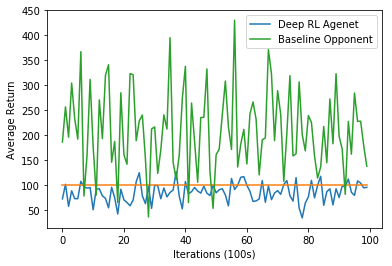

In [13]:
plt.plot(rewards[::10] , label ="Deep RL Agenet")
plt.plot([100 for _ in range(1000)][::10])
plt.plot(r2[::10] , label= "Baseline Opponent")

plt.xlabel("Iterations (100s)")
plt.ylabel("Average Return")
plt.legend();

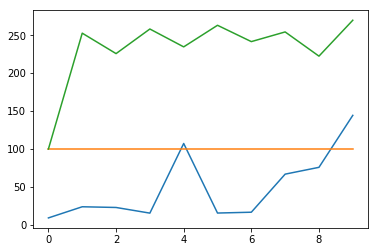

In [20]:
plt.plot(rewards[::100])
plt.plot([100 for _ in range(1000)][::100])
plt.plot(r2[::100])

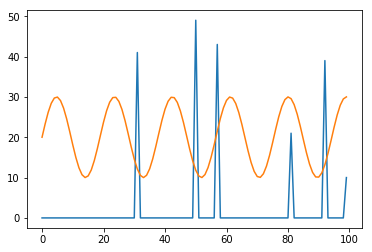

In [17]:
plt.plot(actions[99900:])
plt.plot([sim.sinFunc(x) for x in range(100)])

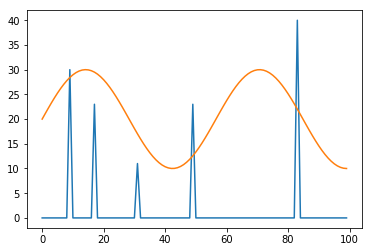

In [8]:
plt.plot(actions[99900:])
plt.plot([sim.sinFunc9(x) for x in range(100)])

Text(0,0.5,'Price')

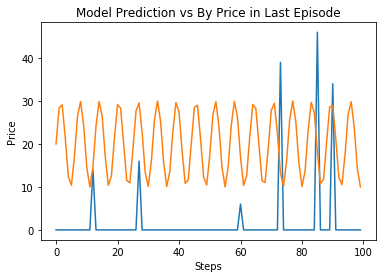

In [11]:
plt.plot(actions[99900:])
plt.plot([sim.sinFunc1(x) for x in range(100)])

plt.title("Model Prediction vs By Price in Last Episode")
plt.xlabel('Steps')
plt.ylabel('Price')

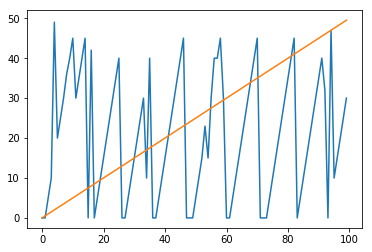

In [8]:
plt.plot(actions[99900:])
plt.plot([sim.increasing(x) for x in range(100)])

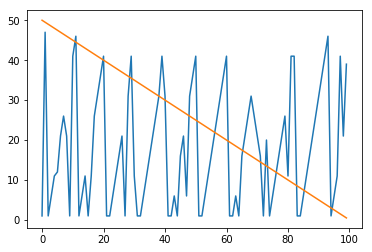

In [22]:
plt.plot(actions[19900:20000])
plt.plot([sim.decreasing(x) for x in range(100)])